In [17]:
import numpy as np

In [29]:
file_path = "pca_data/key_pca.txt"
data = np.loadtxt(file_path) 
data.shape

(12928, 64)

In [30]:
pca = data.reshape((101, 16, 8, 64))   # query (101, 16, 32, 64) ; key (101, 16, 8, 64)
n_sample, n_layer, n_head, n_dim = pca.shape

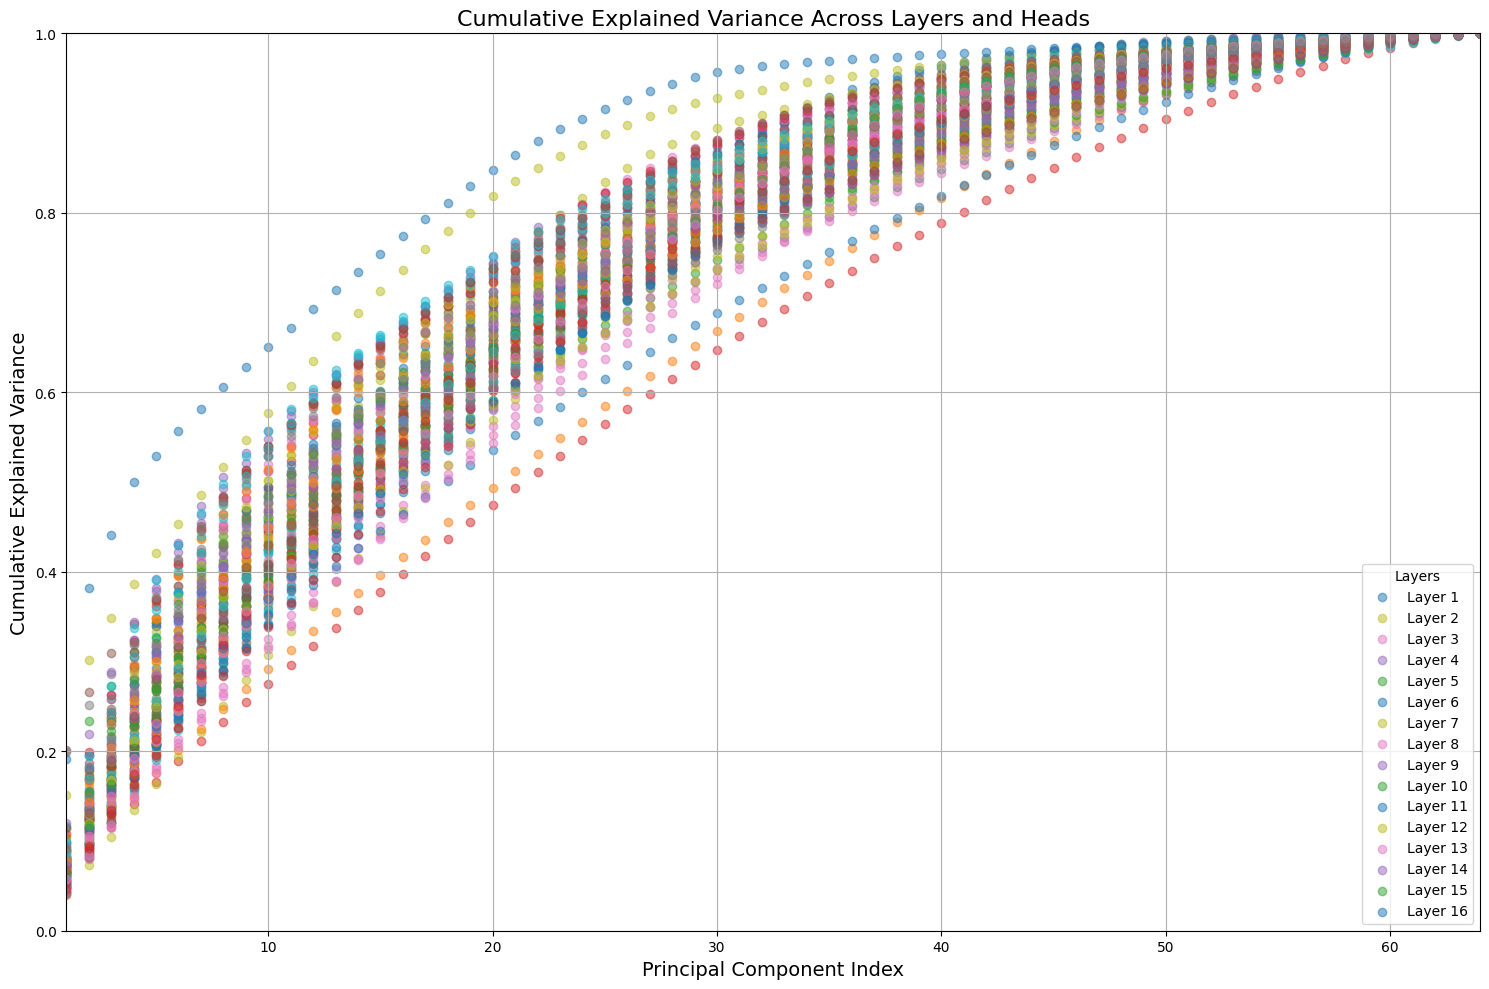

In [31]:
import matplotlib.pyplot as plt

# Step 1: Compute cumulative explained variance for each head in each layer
cumulative_variance = np.cumsum(pca.mean(axis=0), axis=-1)  # Shape: (16, 32, 64)

# Normalize to make it cumulative explained variance (0 to 1)
cumulative_variance /= cumulative_variance[:, :, -1][:, :, None]  # Shape: (16, 32, 64)

# Step 2: Plot cumulative explained variance
num_layers = cumulative_variance.shape[0]
x = np.arange(1, 65)  # Principal component indices (1 to 64)

plt.figure(figsize=(15, 10))

# Plot scatter plots for each layer
for layer_idx in range(num_layers):
    for head_idx in range(cumulative_variance.shape[1]):
        # Scatter plot for each head in the layer
        plt.scatter(x, cumulative_variance[layer_idx, head_idx, :], label=f"Layer {layer_idx + 1}" if head_idx == 0 else "", alpha=0.5)

# Step 3: Customize the plot
plt.title("Cumulative Explained Variance Across Layers and Heads", fontsize=16)
plt.xlabel("Principal Component Index", fontsize=14)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.ylim(0, 1)
plt.xlim(1, 64)
plt.legend(title="Layers", fontsize=10, loc="lower right")
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

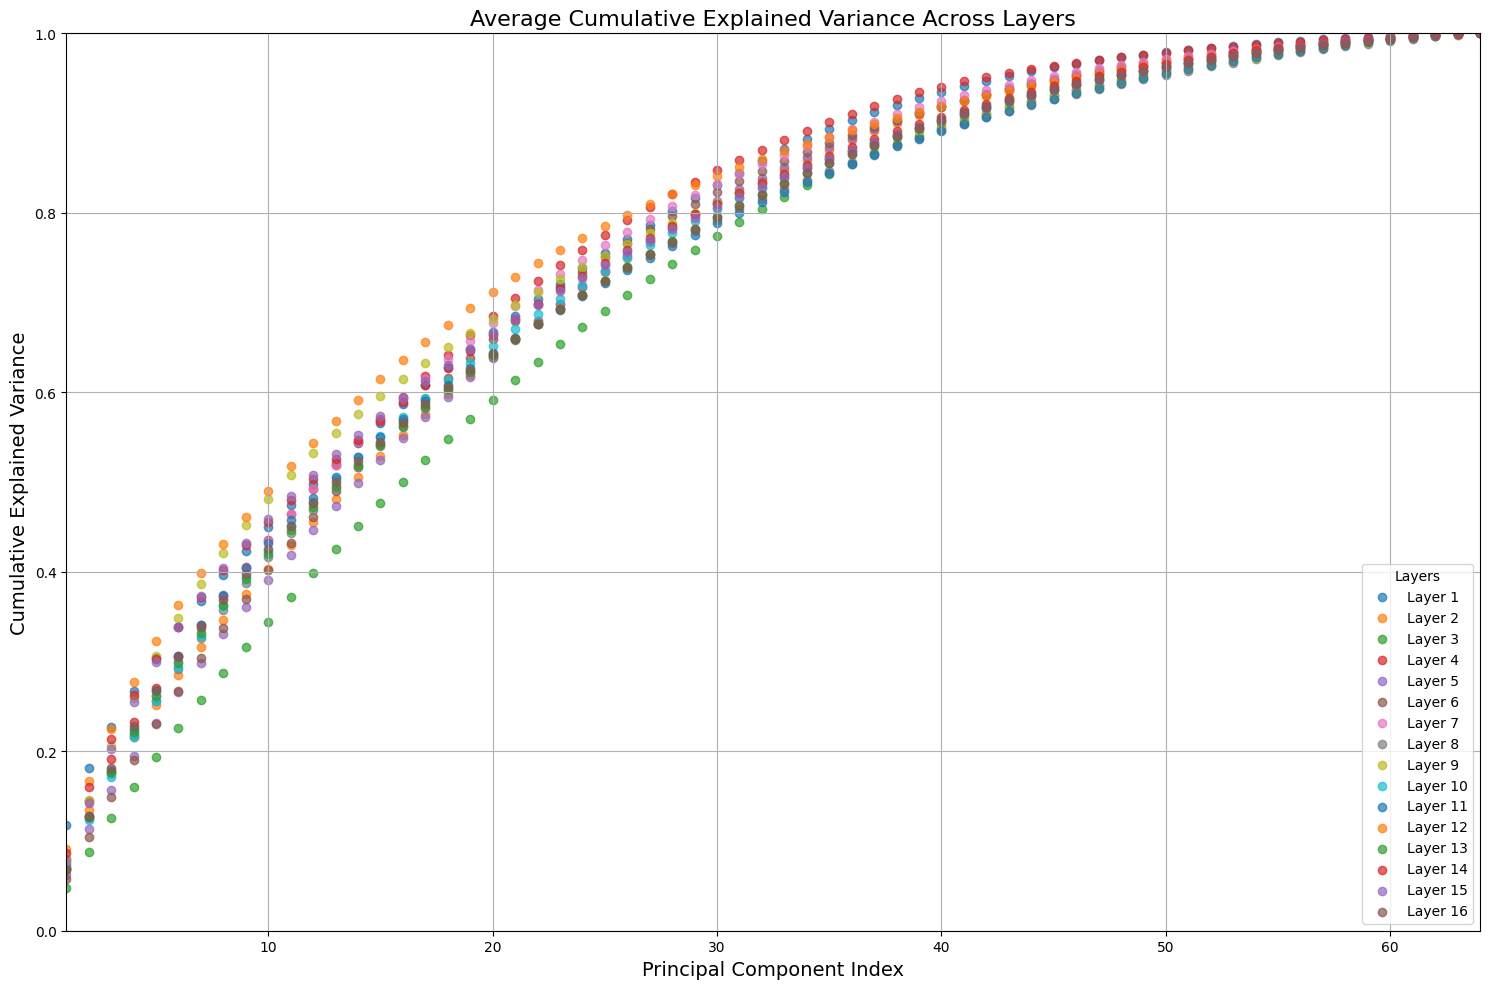

In [32]:
import matplotlib.pyplot as plt

# Assume reshaped_data is already defined with shape (101, 16, 32, 64)

# Step 1: Compute cumulative explained variance for each head in each layer
cumulative_variance = np.cumsum(pca.mean(axis=0), axis=-1)  # Shape: (16, 32, 64)

# Normalize to make it cumulative explained variance (0 to 1)
cumulative_variance /= cumulative_variance[:, :, -1][:, :, None]  # Shape: (16, 32, 64)

# Step 2: Compute the average across 32 heads for each layer
layer_average_cumulative_variance = cumulative_variance.mean(axis=1)  # Shape: (16, 64)

# Step 3: Plot cumulative explained variance for each layer
num_layers = layer_average_cumulative_variance.shape[0]
x = np.arange(1, 65)  # Principal component indices (1 to 64)

plt.figure(figsize=(15, 10))

# Scatter plot for each layer
for layer_idx in range(num_layers):
    plt.scatter(x, layer_average_cumulative_variance[layer_idx, :], label=f"Layer {layer_idx + 1}", alpha=0.7)

# Step 4: Customize the plot
plt.title("Average Cumulative Explained Variance Across Layers", fontsize=16)
plt.xlabel("Principal Component Index", fontsize=14)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.ylim(0, 1)
plt.xlim(1, 64)
plt.legend(title="Layers", fontsize=10, loc="lower right")
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

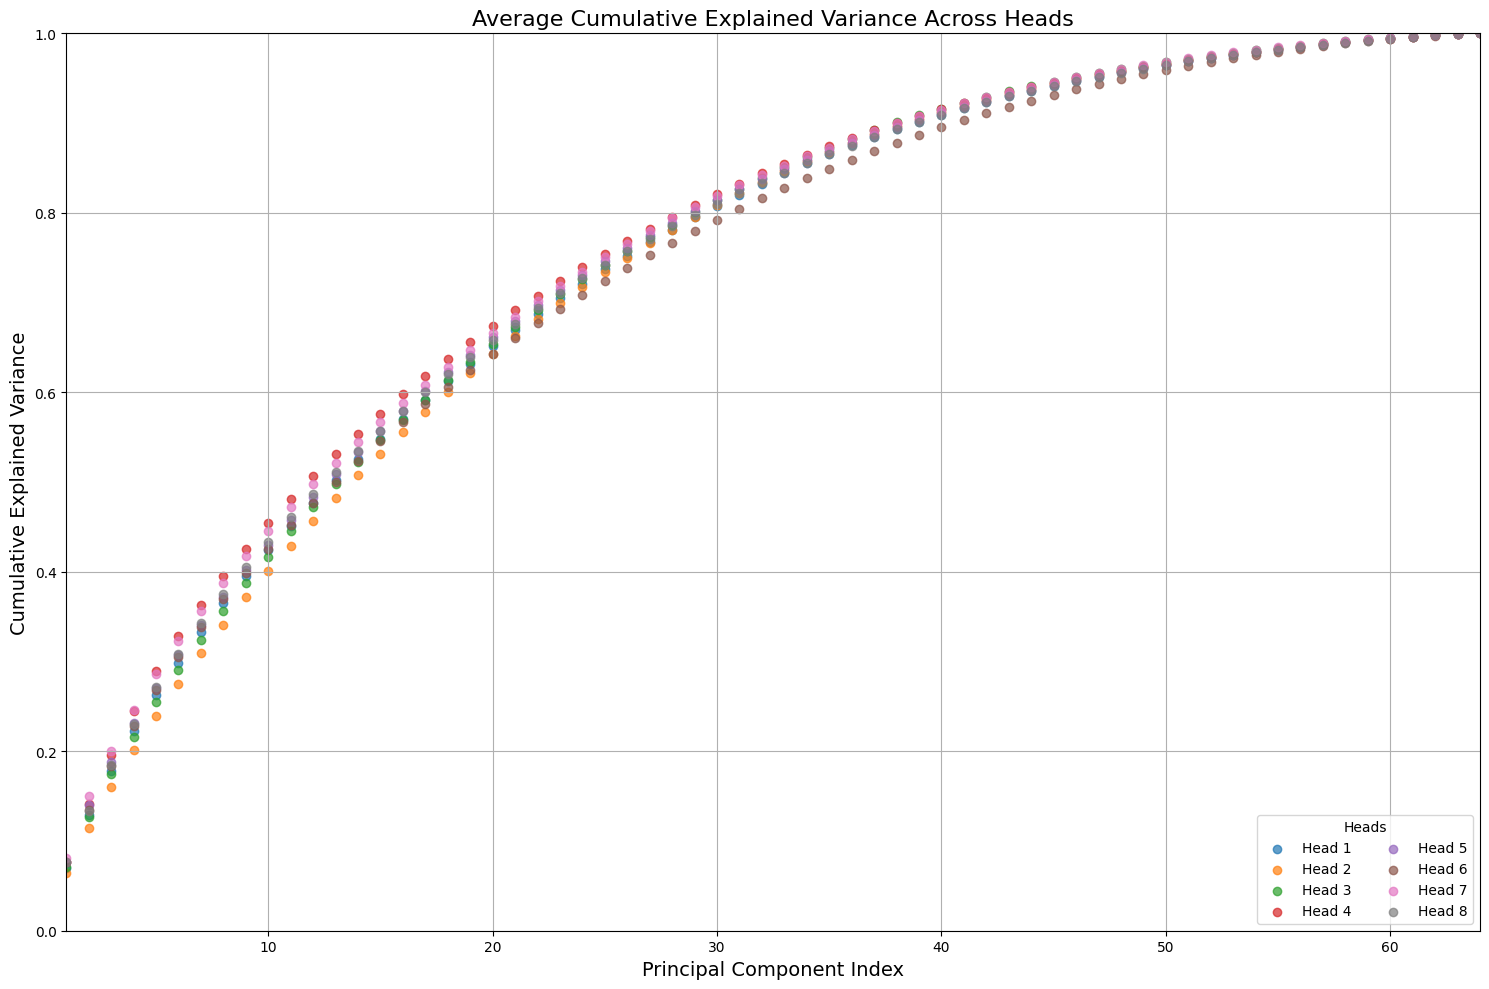

In [33]:
import matplotlib.pyplot as plt

# Assume reshaped_data is already defined with shape (101, 16, 32, 64)

# Step 1: Compute cumulative explained variance for each head in each layer
cumulative_variance = np.cumsum(pca.mean(axis=0), axis=-1)  # Shape: (16, 32, 64)

# Normalize to make it cumulative explained variance (0 to 1)
cumulative_variance /= cumulative_variance[:, :, -1][:, :, None]  # Shape: (16, 32, 64)

# Step 2: Compute the average across 16 layers for each head
head_average_cumulative_variance = cumulative_variance.mean(axis=0)  # Shape: (32, 64)

# Step 3: Plot cumulative explained variance for each head
num_heads = head_average_cumulative_variance.shape[0]
x = np.arange(1, 65)  # Principal component indices (1 to 64)

plt.figure(figsize=(15, 10))

# Scatter plot for each head
for head_idx in range(num_heads):
    plt.scatter(x, head_average_cumulative_variance[head_idx, :], label=f"Head {head_idx + 1}", alpha=0.7)

# Step 4: Customize the plot
plt.title("Average Cumulative Explained Variance Across Heads", fontsize=16)
plt.xlabel("Principal Component Index", fontsize=14)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.ylim(0, 1)
plt.xlim(1, 64)
plt.legend(title="Heads", fontsize=10, loc="lower right", ncol=2)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()